In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from scipy.optimize import curve_fit
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
def make_interp(x,y):
    x,y = sort([x,y])
    x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    spl = make_interp_spline(x, y, k=1) #BSpline object
    y_smooth = spl(x_new)
    return (x_new, y_smooth)

In [4]:
def sort(lst, sort_by_y=False):
    if len(lst)==3:
        x, y, err = lst
    elif len(lst)==2:
        x, y = lst
        
    if not sort_by_y:
        p = x.argsort()
    else:
        p = y.argsort()
    x=x[p]
    y=y[p]
    if len(lst)==3:
        err=err[p]
    
    if len(lst)==3:
        return (x,y,err)
    elif len(lst)==2:
        return (x,y)

In [5]:
# read data
Babkevich_exp_x, Babkevich_exp_y = sort(np.genfromtxt(r'data\Babkevich_exp.txt',unpack=True),sort_by_y=True)
Babkevich_mf_hf_x, Babkevich_mf_hf_y = sort(np.genfromtxt(r'data\Babkevich_mf_hf.txt',unpack=True))
Babkevich_mf_no_hf_x, Babkevich_mf_no_hf_y = sort(np.genfromtxt(r'data\Babkevich_mf_no_hf.txt',unpack=True))
Chakraborty_hf_x, Chakraborty_hf_y = sort(np.genfromtxt(r'data\Chakraborty_hf.txt',unpack=True))
Chakraborty_no_hf_x, Chakraborty_no_hf_y = sort(np.genfromtxt(r'data\Chakraborty_no_hf.txt',unpack=True))
Dunn_Magnetostriction_x, Dunn_Magnetostriction_y, Dunn_Magnetostriction_y_err = sort(np.genfromtxt(r'data\Dunn_Magnetostriction.txt',unpack=True))
Dunn_Thermal_expansion_x, Dunn_Thermal_expansion_y, Dunn_Thermal_expansion_x_err = sort(np.genfromtxt(r'data\Dunn_Thermal_expansion.txt',unpack=True))
Ronnow_exp_x, Ronnow_exp_y = sort(np.genfromtxt(r'data\Ronnow_exp.txt',unpack=True))
Ronnow_mf1_x, Ronnow_mf1_y = sort(np.genfromtxt(r'data\Ronnow_mf1.txt',unpack=True))
Ronnow_mf2_x, Ronnow_mf2_y = sort(np.genfromtxt(r'data\Ronnow_mf2.txt',unpack=True))
Bitko_mf_x, Bitko_mf_y = sort(np.genfromtxt(r'data\Bitko_mf.txt',unpack=True))

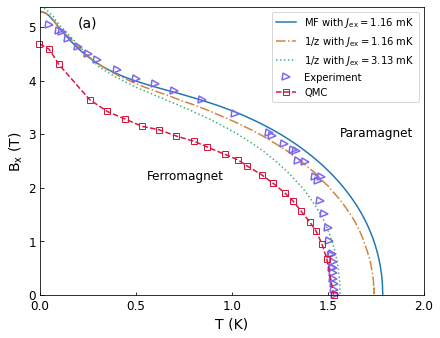

In [100]:
plt.close()
fig=plt.figure(figsize=(6.22,4.8))
plt.plot(Babkevich_mf_hf_x, Babkevich_mf_hf_y, '-', label=r'MF with $J_{\rm{ex}}=1.16$ mK', c='C0')
plt.plot(Ronnow_mf1_x, Ronnow_mf1_y, '-.', label=r'1/z with $J_{\rm{ex}}=1.16$ mK', c='peru')
plt.plot(Ronnow_mf2_x, Ronnow_mf2_y, ':', label=r'1/z with $J_{\rm{ex}}=3.13$ mK', c='mediumseagreen')

# make smooth lines:
Chakraborty_hf_x_guide, Chakraborty_hf_y_guide = make_interp(Chakraborty_hf_x,Chakraborty_hf_y)

plt.plot(Babkevich_exp_x,Babkevich_exp_y,marker='>',mec='mediumslateblue',mew=1.5,ms=7,mfc='none', fillstyle='none', linestyle='none',label='Experiment',clip_on=False)
chakraborty_hf_plt = plt.plot(Chakraborty_hf_x_guide, Chakraborty_hf_y_guide, '--', color='crimson')
line=plt.plot(Chakraborty_hf_x, Chakraborty_hf_y, 's', fillstyle='none', label='QMC', color=chakraborty_hf_plt[0].get_color(),clip_on=False)

plt.ylabel(r'$\mathrm{B_x}$ (T)',fontsize=14)
plt.xlabel(r'T (K)',fontsize=14)
lgnd=plt.legend()

from matplotlib.ticker import MaxNLocator
ax=plt.gca()
ax.set_xlim([0,2])
# ax.xaxis.set_major_locator(MaxNLocator(prune='lower'))
ax.text(0.1, 0.93, '(a)', transform=ax.transAxes, fontsize=14)
ax.text(0.28, 0.4, 'Ferromagnet', transform=ax.transAxes, fontsize=12)
ax.text(0.78, 0.55, 'Paramagnet', transform=ax.transAxes, fontsize=12)
ax.locator_params(axis='x', nbins=6)
ax.tick_params(axis='x', which='major', labelsize=12, direction="in", pad=5)
ax.tick_params(axis='y', which='major', labelsize=12, direction="in")
plt.margins(0)
lgnd.legendHandles[4].set_linestyle('--')
plt.tight_layout()
# fig.savefig(r'figures\phase_diagram_full.pdf',format='pdf')
plt.show()

In [52]:
%matplotlib inline

In [101]:
fig.savefig(r'figures\phase_diagram_full.pdf',format='pdf')